### Pandas를 활용한 금융 데이터 분석 및 시각화 예시

In [1]:
import numpy as np
import pandas as pd
import pandas_datareader.data as reader

In [2]:
sam = reader.DataReader('005930.KS', data_source='yahoo', start='2015/12/30', end='2020/1/30')
sam.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-12-30,25440.0,25080.0,25200.0,25200.0,10197900.0,1210.466919
2016-01-04,25200.0,24100.0,25200.0,24100.0,15346950.0,1157.629150
2016-01-05,24360.0,23720.0,24040.0,24160.0,10800100.0,1160.511230
2016-01-06,24160.0,23360.0,24160.0,23500.0,18337600.0,1128.808350
2016-01-07,23660.0,23020.0,23320.0,23260.0,14119400.0,1117.280273


In [3]:
# 42d : 42일 이동평균
sam['42d'] = sam['Close'].rolling(window=42).mean()

# 252d : 252일 이동평균
sam['252d'] = sam['Close'].rolling(window=252).mean()

# Log_return : 로그 수익률
sam['Log_ret'] = np.log(sam['Close'] / sam['Close'].shift(1))

# Mov_vol : 이동 역사적 변동성 -> 로그 수익률의 이동표준편차, 252 = 연간 거래일
sam['Mov_vol'] = (sam['Log_ret'].rolling(window=252).std()) * np.sqrt(252)

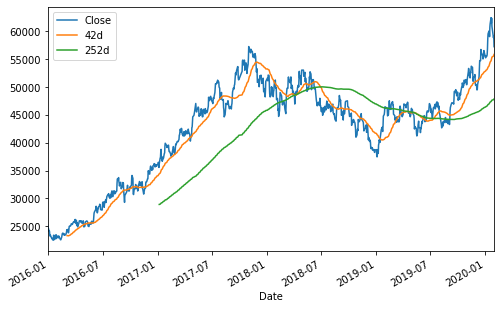

In [6]:
%matplotlib inline
sam[['Close', '42d', '252d']].plot(figsize=(8, 5))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000251B2EDAE48>,
      dtype=object)

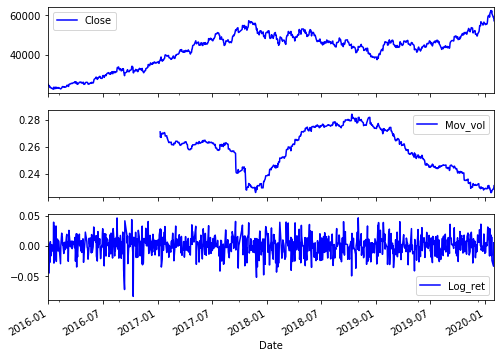

In [7]:
sam[['Close', 'Mov_vol', 'Log_ret']].plot(subplots=True, color='blue', figsize=(8, 6))